# EDA – Caso práctico 3
Exploración del dataset.

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from src.trafficincidentdetection.preprocess import load_all_data, preprocess_data
from src.trafficincidentdetection.config import Settings
from collections import Counter
settings = Settings()
df = load_all_data(settings.raw_data_dir_path)
#display(df)
display(df.info())
print()
print("Columnas con cantidad de valores nulos")
display(df.isnull().sum())

Cargado tweets_trafico_rd_20251029_224841.csv: 355 registros
Cargado tweets_trafico_rd_20251029_230315.csv: 5000 registros
Cargado tweets_trafico_rd_20251031_064841.csv: 5000 registros
Cargado tweets_trafico_rd_20251101_010818.csv: 4987 registros
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15342 entries, 0 to 15341
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         15342 non-null  object             
 1   texto            15342 non-null  object             
 2   fecha            15342 non-null  datetime64[ns, UTC]
 3   incidente_tipo   15342 non-null  object             
 4   severidad        15342 non-null  object             
 5   ubicacion_texto  2204 non-null   object             
 6   url              15342 non-null  object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 839.1+ KB


None


Columnas con cantidad de valores nulos


tweet_id               0
texto                  0
fecha                  0
incidente_tipo         0
severidad              0
ubicacion_texto    13138
url                    0
dtype: int64

## Preprocess

In [5]:
df = preprocess_data(df)
#display(df)

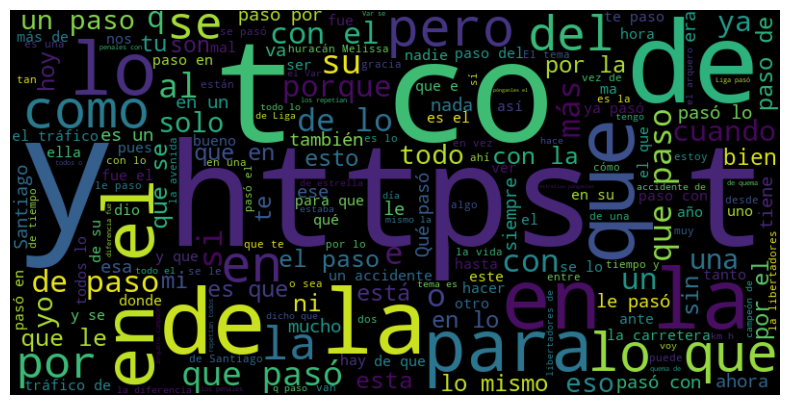

Most common words: [(' ', 397725), ('a', 217930), ('e', 213610), ('o', 162276), ('s', 125617), ('n', 115763), ('r', 109470), ('i', 103893), ('t', 93142), ('l', 90131), ('d', 76186), ('c', 73107), ('u', 69929), ('p', 55685), ('m', 47346), ('h', 24254), ('.', 24106), ('g', 22305), ('b', 21303), ('q', 19874)]


In [6]:
df['texto'] = df['texto'].astype(str)
df.dropna(subset=['texto'], inplace=True)
df.describe(include='all')
if 'sentimiento' in df.columns:
    df['sentimiento'].value_counts().plot(kind='bar')
    plt.title('Distribución de sentimiento')
    plt.show()

text = ' '.join(df['texto'].tolist())
wordcloud = WordCloud(width=800, height=400).generate(text)
#wordcloud.to_image()
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# Top N frequent words
words = text.split()
word_freq = Counter(text)
most_common_words = word_freq.most_common(20)
print("Most common words:", most_common_words)